In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

webpage=requests.get('https://housing.com/in/buy/searches/M2P6xfqdsey6cc3d95hS1',headers=headers).text

'<!doctype html><html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#"><head><link rel="preconnect" href="//c.housingcdn.com"/><link rel="preconnect" href="//is1-3.housingcdn.com"/><link rel="preconnect" href="//eventrouter.housing.com"/><link rel="preconnect" href="//img.youtube.com"/><link rel="preconnect" href="//is1-2.housingcdn.com"/><meta http-equiv="origin-trial" content="AsgGWjPX2xx12aBpNxa8enFVy/0d/Ghc/GLjQO1gdmgn6eayydZJK0TGTifjIngm+7B4rWjfgVoyHZFbeKq0pg4AAABgeyJvcmlnaW4iOiJodHRwczovL2hvdXNpbmcuY29tOjQ0MyIsImZlYXR1cmUiOiJXYWtlTG9jayIsImV4cGlyeSI6MTU5MTA5NTk2MSwiaXNTdWJkb21haW4iOnRydWV9"/><meta name="referrer" content="no-referrer-when-downgrade"/><link rel="prefetch" href="//c.housingcdn.com/demand/s/client/common/assets/loader.fd27d2ce.svg" as="image"/><link rel="preload" href="//c.housingcdn.com/demand/s/client/common/assets/property-fallback-no-photos.b7838350.png" as="image"/><link rel="preload" href="//c.housingcdn.com/demand/s/client/common/as
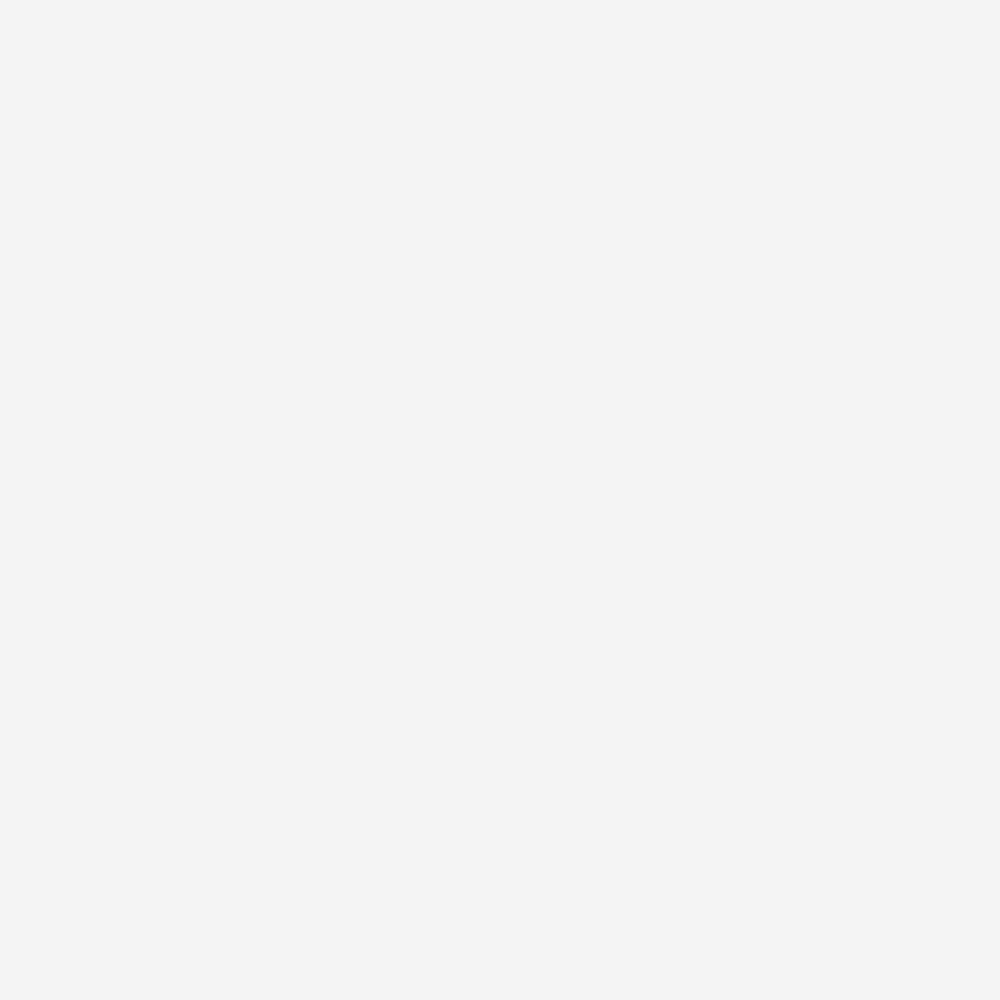
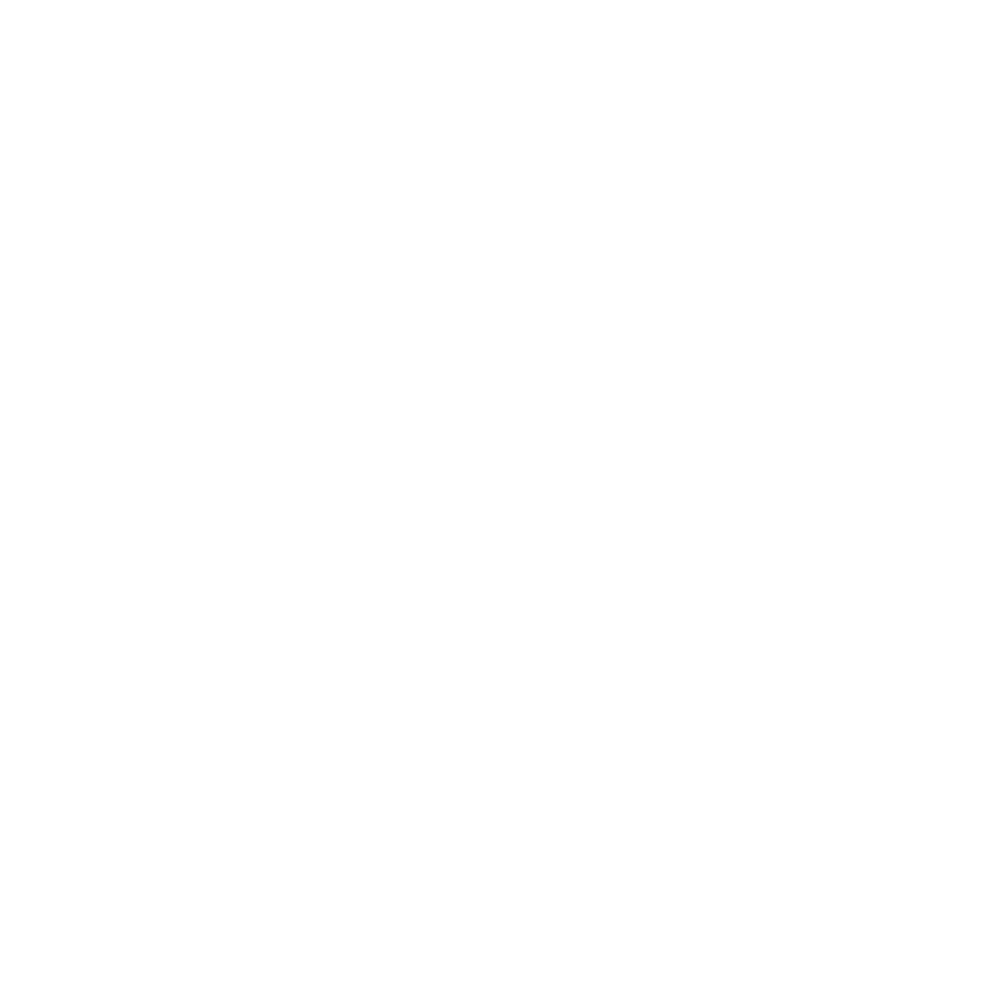

In [3]:
webpage

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#"><head><link href="//c.housingcdn.com" rel="preconnect"/><link href="//is1-3.housingcdn.com" rel="preconnect"/><link href="//eventrouter.housing.com" rel="preconnect"/><link href="//img.youtube.com" rel="preconnect"/><link href="//is1-2.housingcdn.com" rel="preconnect"/><meta content="AsgGWjPX2xx12aBpNxa8enFVy/0d/Ghc/GLjQO1gdmgn6eayydZJK0TGTifjIngm+7B4rWjfgVoyHZFbeKq0pg4AAABgeyJvcmlnaW4iOiJodHRwczovL2hvdXNpbmcuY29tOjQ0MyIsImZlYXR1cmUiOiJXYWtlTG9jayIsImV4cGlyeSI6MTU5MTA5NTk2MSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="no-referrer-when-downgrade" name="referrer"/><link as="image" href="//c.housingcdn.com/demand/s/client/common/assets/loader.fd27d2ce.svg" rel="prefetch"/><link as="image" href="//c.housingcdn.com/demand/s/client/common/assets/property-fallback-no-photos.b7838350.png" rel="preload"/><link as="font" crossorigin="anonymous" href="//c.housingcdn.com/deman
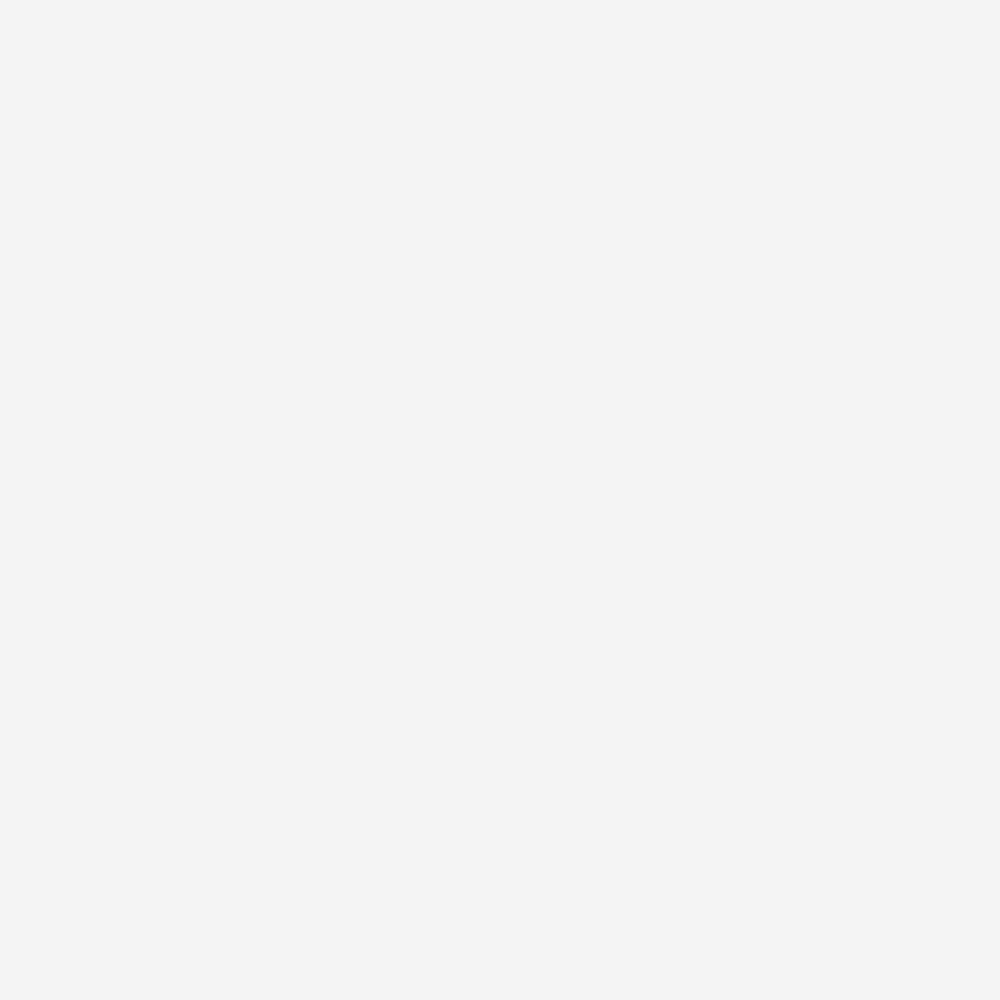
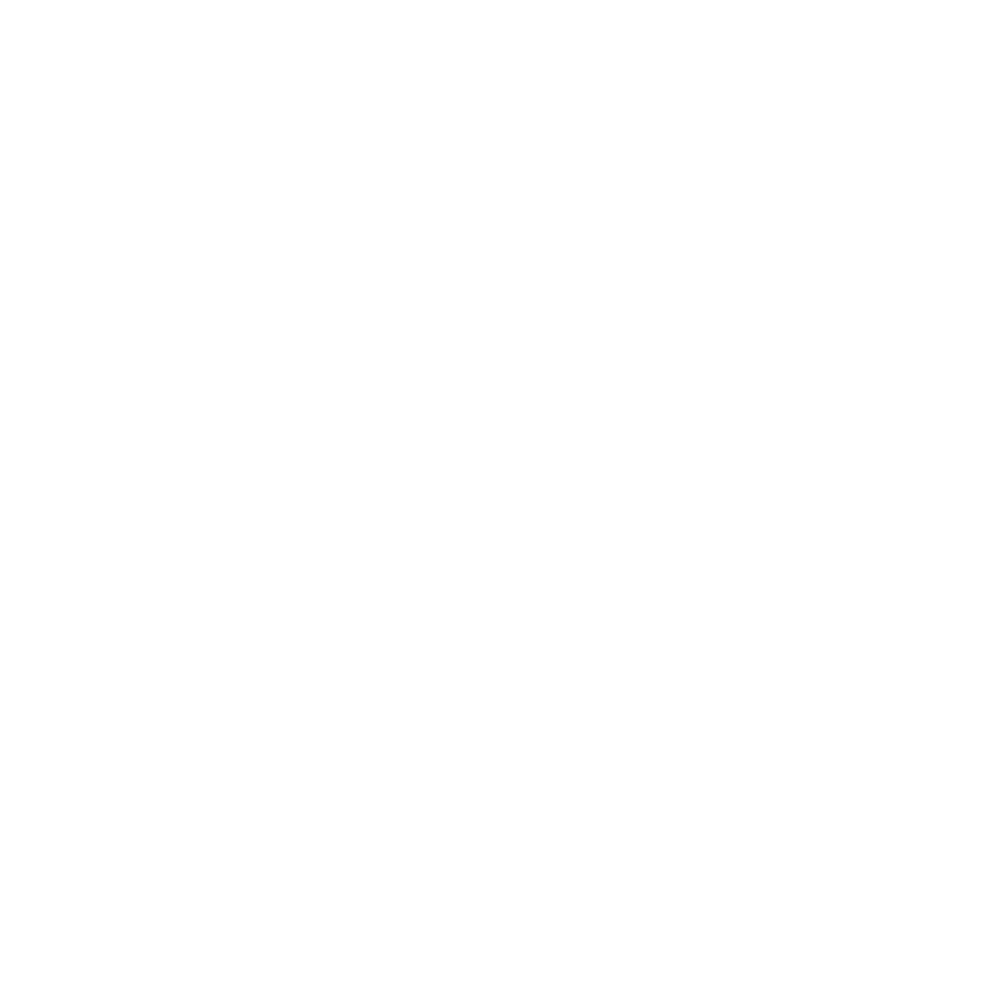

In [4]:

soup=BeautifulSoup(webpage,'lxml')
soup

In [5]:
soup.find_all('h1')[0].text

'Independent Houses for Sale in New Delhi'

In [6]:
price=[]
soup.find_all('div',class_='_csbfng _c8exct _g3exct _7l1ulh _gq1y44')[0].text


'₹1.41 Cr'

In [7]:
newpage=soup.find_all('div',class_='_9s1txw _0h1h6o')
newpage[1].text

'₹1.1 LEMI starts at ₹582'

In [8]:
def manipulatetext(text):
    i=-1;
    while(text[i]!=' '):
        i-=1;
    check=text[i-2];
    check+=text[i-1];
    if(check=='in'):
         return i;
    else:
         while(text[i-1]!=' '):
                 i-=1;
    return i;

In [9]:
newpage2=soup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _7s5wglyw _5vy24jg8 _blas1v10 new-title')
newpage2[29].text

'1 BHK Independent House for sale in Rajpur Khurd Village'

In [10]:
i=manipulatetext('1 BHK Independent House for sale in Mukundpur Nagar')

In [11]:
'1 BHK Independent House for sale in Mukundpur Nagar'[i:]

'Mukundpur Nagar'

In [12]:
address=[]
for i in range(30):
    mytext=newpage2[i].text
    i=manipulatetext(mytext)
    addres=mytext[i:]+',New Delhi'
    address.append(addres)

In [13]:
address

['Adarsh Nagar,New Delhi',
 ' Mukundpur,New Delhi',
 ' Narela,New Delhi',
 ' Najafgarh,New Delhi',
 'Mukherjee Nagar,New Delhi',
 ' Najafgarh,New Delhi',
 'Razapur Khurd,New Delhi',
 '25 Rohini,New Delhi',
 ' Dakshinpuri,New Delhi',
 ' Mandoli,New Delhi',
 ' Gokalpur,New Delhi',
 ' Wazirabad,New Delhi',
 ' Sabhapur,New Delhi',
 'Suleman Nagar,New Delhi',
 ' Bindapur,New Delhi',
 'Karawal Nagar,New Delhi',
 'Patel Nagar,New Delhi',
 'Garden Extension,New Delhi',
 'Sangam Vihar,New Delhi',
 ' Najafgarh,New Delhi',
 '28 ,New Delhi',
 'Mathur Lane,New Delhi',
 ' Burari,New Delhi',
 'New Mustafabad,New Delhi',
 ' Bhalswa,New Delhi',
 'Krishna Nagar,New Delhi',
 ' Karala,New Delhi',
 ' Bhalswa,New Delhi',
 'Aya Nagar,New Delhi',
 'Khurd Village,New Delhi']

In [14]:
def findtype(text):
    i=0;
    while(text[i]!='I'):
        i+=1;
    return text[0:i]

In [15]:
price=[]
house_type=[]
newpage2=soup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _7s5wglyw _5vy24jg8 _blas1v10 new-title')
newpage2[0].text
for i in range(30):
    text=newpage2[i].text
    f_price=findtype(text)
    house_type.append(f_price)

In [16]:
house_type

['2 BHK ',
 '1 BHK ',
 '1 BHK ',
 '2 BHK ',
 '6 BHK ',
 '1 BHK ',
 '3 BHK ',
 '3 BHK ',
 '2 BHK ',
 '1 RK ',
 '2 BHK ',
 '4 BHK ',
 '1 BHK ',
 '1 RK ',
 '2 BHK ',
 '1 BHK ',
 '1 BHK ',
 '1 RK ',
 '1 BHK ',
 '4 BHK ',
 '2R ',
 '2 BHK ',
 '3 BHK ',
 '2 BHK ',
 '3 BHK ',
 '5 BHK ',
 '2 BHK ',
 '1 RK ',
 '1 BHK ',
 '1 BHK ']

In [17]:
price

[]

In [18]:
owner=[]
for i in range(30):
    name=soup.find_all('div',class_='css-wni7av')[i].text
    owner.append(name)

In [19]:
owner

['Niraj Verma',
 'VASHUNDHARA DEVI',
 'Raman Sachdeva',
 'Ruvi',
 'Sunil Gulati',
 'Gulshan',
 'Rajesh Jee',
 'Siya',
 'Omprakash',
 'Suneel Soni',
 'SUNNY SHARMA',
 'Neeraj Tyagi',
 'Sandeep Tripathi',
 'Mukesh James',
 'Housing Partner',
 'Suman',
 'Raj',
 'Nitin Mandora',
 'Sandeep Aggarwal',
 'Sushma Dive',
 'Nitin Kumar',
 'Ritik',
 'Sajan',
 'Parveen Kumar',
 'Shivam',
 'Vishal Sharma',
 'Ajay',
 'Deepak Gautam',
 'Pooja Tikkiee',
 'Asin']

In [20]:
soup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _vy1ipv _7ltvct _g3dlk8 _c81fwx _cs1nn1 value')[0].text

'₹3.20 K/sq.ft'

In [21]:
average_price=[]
for i in range(30):
    average_price.append(soup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _vy1ipv _7ltvct _g3dlk8 _c81fwx _cs1nn1 value')[i].text)

In [22]:
average_price

['₹3.20 K/sq.ft',
 '1000 sq.ft',
 '65.00/sq.ft',
 'Semi Furnished',
 '280 sq.ft',
 '392.00/sq.ft',
 'Semi Furnished',
 'Pocket F',
 '160 sq.ft',
 '937.00/sq.ft',
 '150 sq.ft',
 '2.33k/sq.ft',
 'Fully Furnished',
 '720 sq.ft',
 '694.00/sq.ft',
 'Unfurnished',
 '540 sq.ft',
 '1.11k/sq.ft',
 'Unfurnished',
 'The Light ',
 '1245 sq.ft',
 '562.00/sq.ft',
 '900 sq.ft',
 '777.00/sq.ft',
 'Unfurnished',
 'delhi',
 '846 sq.ft',
 '827.00/sq.ft',
 '216 sq.ft',
 '3.47k/sq.ft']

In [23]:

Area=[]
for i in range(30):
    Area.append(soup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _vy1ipv _7ltvct _g3dlk8 _c81fwx _cs1nn1 value')[i].text)
Area

['₹3.20 K/sq.ft',
 '1000 sq.ft',
 '65.00/sq.ft',
 'Semi Furnished',
 '280 sq.ft',
 '392.00/sq.ft',
 'Semi Furnished',
 'Pocket F',
 '160 sq.ft',
 '937.00/sq.ft',
 '150 sq.ft',
 '2.33k/sq.ft',
 'Fully Furnished',
 '720 sq.ft',
 '694.00/sq.ft',
 'Unfurnished',
 '540 sq.ft',
 '1.11k/sq.ft',
 'Unfurnished',
 'The Light ',
 '1245 sq.ft',
 '562.00/sq.ft',
 '900 sq.ft',
 '777.00/sq.ft',
 'Unfurnished',
 'delhi',
 '846 sq.ft',
 '827.00/sq.ft',
 '216 sq.ft',
 '3.47k/sq.ft']

In [24]:

soup.find_all('div',class_='_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh')[0].text

'₹65.0k'

In [25]:
price=[]
for i in range(30):
    price.append(soup.find_all('div',class_='_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh')[i].text)
price

['₹65.0k',
 '₹1.1 L',
 '₹1.5 L',
 '₹3.5 L',
 '₹5.0 L',
 '₹6.0 L',
 '₹7.0 L',
 '₹7.0 L',
 '₹7.0 L',
 '₹7.5 L',
 '₹8.0 L',
 '₹8.0 L',
 '₹8.0 L',
 '₹8.5 L',
 '₹9.0 L',
 '₹9.0 L',
 '₹9.5 L',
 '₹9.5 L',
 '₹9.8 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹11.0 L',
 '₹12.0 L',
 '₹12.0 L',
 '₹12.0 L',
 '₹13.0 L',
 '₹13.0 L']

In [26]:
HousePriceDelhi={'Address':address,'price':price,'owner':owner,'Area':Area,'Average_price':average_price}

In [27]:
HousePriceDelhi


{'Address': ['Adarsh Nagar,New Delhi',
  ' Mukundpur,New Delhi',
  ' Narela,New Delhi',
  ' Najafgarh,New Delhi',
  'Mukherjee Nagar,New Delhi',
  ' Najafgarh,New Delhi',
  'Razapur Khurd,New Delhi',
  '25 Rohini,New Delhi',
  ' Dakshinpuri,New Delhi',
  ' Mandoli,New Delhi',
  ' Gokalpur,New Delhi',
  ' Wazirabad,New Delhi',
  ' Sabhapur,New Delhi',
  'Suleman Nagar,New Delhi',
  ' Bindapur,New Delhi',
  'Karawal Nagar,New Delhi',
  'Patel Nagar,New Delhi',
  'Garden Extension,New Delhi',
  'Sangam Vihar,New Delhi',
  ' Najafgarh,New Delhi',
  '28 ,New Delhi',
  'Mathur Lane,New Delhi',
  ' Burari,New Delhi',
  'New Mustafabad,New Delhi',
  ' Bhalswa,New Delhi',
  'Krishna Nagar,New Delhi',
  ' Karala,New Delhi',
  ' Bhalswa,New Delhi',
  'Aya Nagar,New Delhi',
  'Khurd Village,New Delhi'],
 'price': ['₹65.0k',
  '₹1.1 L',
  '₹1.5 L',
  '₹3.5 L',
  '₹5.0 L',
  '₹6.0 L',
  '₹7.0 L',
  '₹7.0 L',
  '₹7.0 L',
  '₹7.5 L',
  '₹8.0 L',
  '₹8.0 L',
  '₹8.0 L',
  '₹8.5 L',
  '₹9.0 L',
  '₹9.0 

In [28]:
df=pd.DataFrame(HousePriceDelhi)
df

,Address,price,owner,Area,Average_price
0,"Adarsh Nagar,New Delhi",₹65.0k,Niraj Verma,₹3.20 K/sq.ft,₹3.20 K/sq.ft
1,"Mukundpur,New Delhi",₹1.1 L,VASHUNDHARA DEVI,1000 sq.ft,1000 sq.ft
2,"Narela,New Delhi",₹1.5 L,Raman Sachdeva,65.00/sq.ft,65.00/sq.ft
3,"Najafgarh,New Delhi",₹3.5 L,Ruvi,Semi Furnished,Semi Furnished
4,"Mukherjee Nagar,New Delhi",₹5.0 L,Sunil Gulati,280 sq.ft,280 sq.ft
5,"Najafgarh,New Delhi",₹6.0 L,Gulshan,392.00/sq.ft,392.00/sq.ft
6,"Razapur Khurd,New Delhi",₹7.0 L,Rajesh Jee,Semi Furnished,Semi Furnished
7,"25 Rohini,New Delhi",₹7.0 L,Siya,Pocket F,Pocket F
8,"Dakshinpuri,New Delhi",₹7.0 L,Omprakash,160 sq.ft,160 sq.ft
9,"Mandoli,New Delhi",₹7.5 L,Suneel Soni,937.00/sq.ft,937.00/sq.ft


In [29]:
soup.find_all('div',class_='_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh')[29]

<div class="_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh">₹13.0 L</div>

In [30]:
newpage=requests.get('https://housing.com/in/buy/searches/M2P6xfqdsey6cc3d95hS3Y1').text

In [31]:
newsoup=BeautifulSoup(newpage,'lxml')

'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#">\n <head>\n  <link href="//c.housingcdn.com" rel="preconnect"/>\n  <link href="//is1-3.housingcdn.com" rel="preconnect"/>\n  <link href="//eventrouter.housing.com" rel="preconnect"/>\n  <link href="//img.youtube.com" rel="preconnect"/>\n  <link href="//is1-2.housingcdn.com" rel="preconnect"/>\n  <meta content="AsgGWjPX2xx12aBpNxa8enFVy/0d/Ghc/GLjQO1gdmgn6eayydZJK0TGTifjIngm+7B4rWjfgVoyHZFbeKq0pg4AAABgeyJvcmlnaW4iOiJodHRwczovL2hvdXNpbmcuY29tOjQ0MyIsImZlYXR1cmUiOiJXYWtlTG9jayIsImV4cGlyeSI6MTU5MTA5NTk2MSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>\n  <meta content="no-referrer-when-downgrade" name="referrer"/>\n  <link as="image" href="//c.housingcdn.com/demand/s/client/common/assets/loader.fd27d2ce.svg" rel="prefetch"/>\n  <title itemprop="name">\n   Independent Houses in New Delhi | 1941+ Houses for sale in New Delhi\n  </title>\n  <script type="application/ld+json">\n   [{"@co
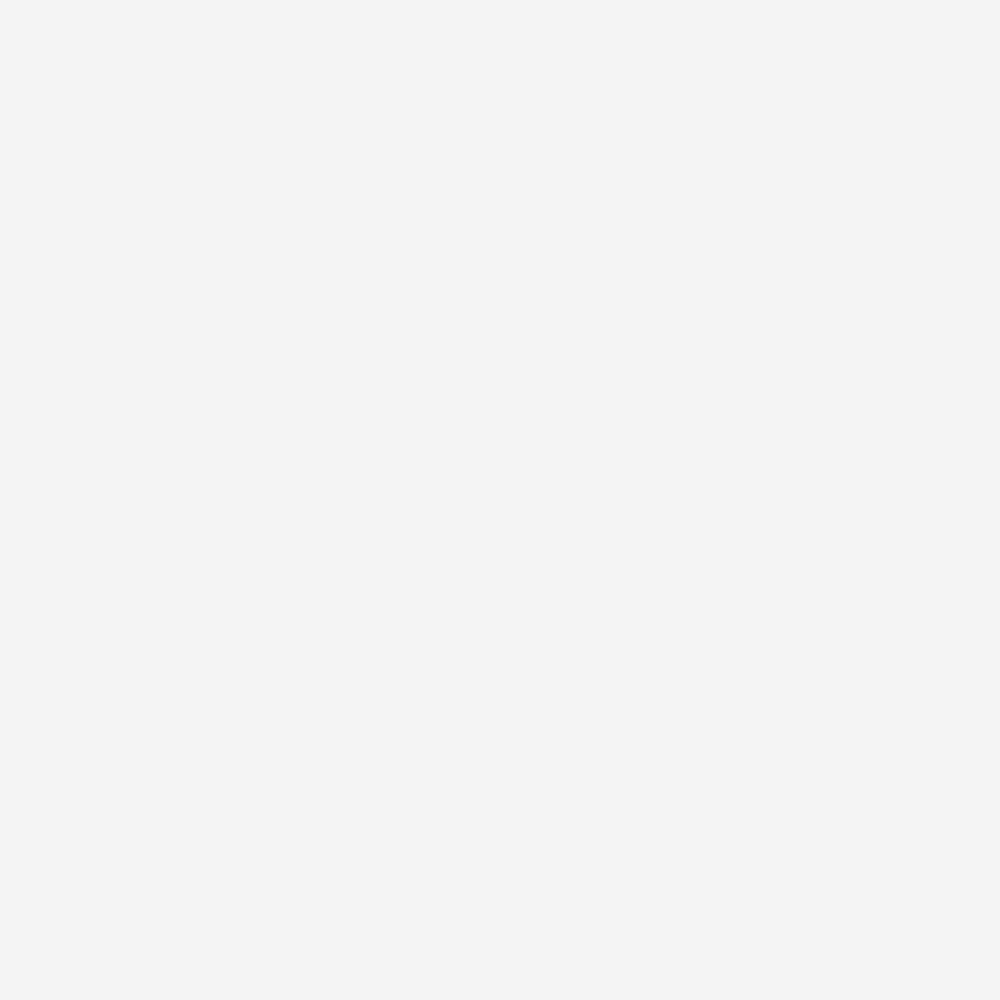
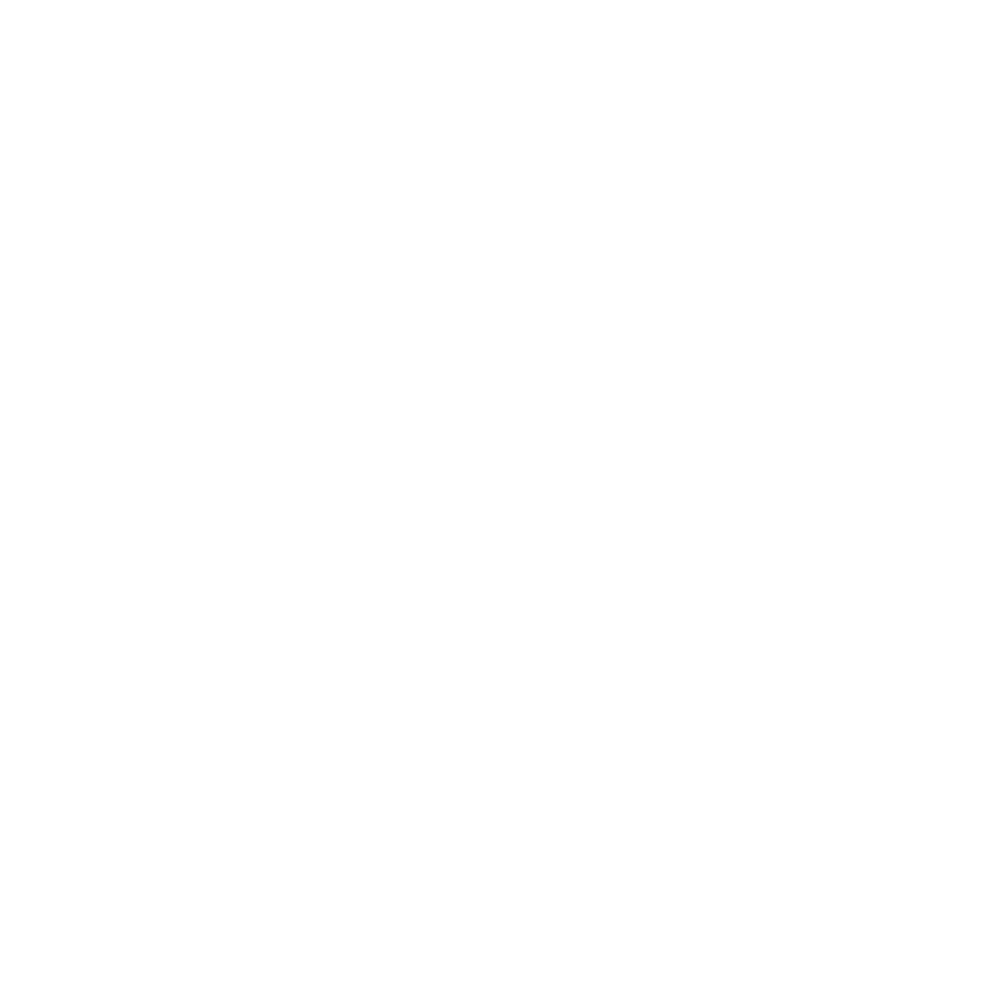

In [32]:
newsoup.prettify()

In [33]:

newsoup.find_all('div',class_='_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh')[29].text

'₹7.0 Cr'

In [34]:
for i in range(30):
    price.append(newsoup.find_all('div',class_='_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh')[i].text)
price

['₹65.0k',
 '₹1.1 L',
 '₹1.5 L',
 '₹3.5 L',
 '₹5.0 L',
 '₹6.0 L',
 '₹7.0 L',
 '₹7.0 L',
 '₹7.0 L',
 '₹7.5 L',
 '₹8.0 L',
 '₹8.0 L',
 '₹8.0 L',
 '₹8.5 L',
 '₹9.0 L',
 '₹9.0 L',
 '₹9.5 L',
 '₹9.5 L',
 '₹9.8 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹10.0 L',
 '₹11.0 L',
 '₹12.0 L',
 '₹12.0 L',
 '₹12.0 L',
 '₹13.0 L',
 '₹13.0 L',
 '₹12.0 Cr',
 '₹8.5 Cr',
 '₹15.0 Cr',
 '₹26.0 Cr',
 '₹3.0 Cr',
 '₹3.2 Cr',
 '₹7.5 Cr',
 '₹3.0 Cr',
 '₹60.0 Cr',
 '₹60.0 Cr',
 '₹22.5 Cr',
 '₹55.0 Cr',
 '₹85.0 Cr',
 '₹40.0 Cr',
 '₹11.0 Cr',
 '₹41.0 Cr',
 '₹10.0 Cr',
 '₹2.5 Cr',
 '₹12.5 Cr',
 '₹99.0 Cr',
 '₹60.0 Cr',
 '₹34.0 Cr',
 '₹23.0 Cr',
 '₹31.0 Cr',
 '₹90.0 Cr',
 '₹20.0 Cr',
 '₹32.0 Cr',
 '₹96.0 Cr',
 '₹18.0 Cr',
 '₹7.0 Cr']

In [35]:

for i in range(30):
    Area.append(newsoup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _vy1ipv _7ltvct _g3dlk8 _c81fwx _cs1nn1 value')[i].text)
Area

['₹3.20 K/sq.ft',
 '1000 sq.ft',
 '65.00/sq.ft',
 'Semi Furnished',
 '280 sq.ft',
 '392.00/sq.ft',
 'Semi Furnished',
 'Pocket F',
 '160 sq.ft',
 '937.00/sq.ft',
 '150 sq.ft',
 '2.33k/sq.ft',
 'Fully Furnished',
 '720 sq.ft',
 '694.00/sq.ft',
 'Unfurnished',
 '540 sq.ft',
 '1.11k/sq.ft',
 'Unfurnished',
 'The Light ',
 '1245 sq.ft',
 '562.00/sq.ft',
 '900 sq.ft',
 '777.00/sq.ft',
 'Unfurnished',
 'delhi',
 '846 sq.ft',
 '827.00/sq.ft',
 '216 sq.ft',
 '3.47k/sq.ft',
 '₹3.20 K/sq.ft',
 '₹3.20 K/sq.ft',
 '200 sq.ft',
 '6.0 L/sq.ft',
 'Unfurnished',
 '200 sq.ft',
 '6.0 L/sq.ft',
 'Unfurnished',
 'No Parking',
 'No Charge',
 '160 sq.ft',
 '5.31 L/sq.ft',
 'Semi Furnished',
 '160 sq.ft',
 '5.31 L/sq.ft',
 'Semi Furnished',
 '8',
 'Available',
 '₹8.5 Lacs',
 '400 sq.ft',
 '3.75 L/sq.ft',
 'Fully Furnished',
 '400 sq.ft',
 '3.75 L/sq.ft',
 'Fully Furnished',
 '1',
 'Available',
 'No Charge',
 '1179 sq.ft',
 '2.21 L/sq.ft']

In [36]:

for i in range(30):
    average_price.append(newsoup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _vy1ipv _7ltvct _g3dlk8 _c81fwx _cs1nn1 value')[i].text)

In [37]:
average_price

['₹3.20 K/sq.ft',
 '1000 sq.ft',
 '65.00/sq.ft',
 'Semi Furnished',
 '280 sq.ft',
 '392.00/sq.ft',
 'Semi Furnished',
 'Pocket F',
 '160 sq.ft',
 '937.00/sq.ft',
 '150 sq.ft',
 '2.33k/sq.ft',
 'Fully Furnished',
 '720 sq.ft',
 '694.00/sq.ft',
 'Unfurnished',
 '540 sq.ft',
 '1.11k/sq.ft',
 'Unfurnished',
 'The Light ',
 '1245 sq.ft',
 '562.00/sq.ft',
 '900 sq.ft',
 '777.00/sq.ft',
 'Unfurnished',
 'delhi',
 '846 sq.ft',
 '827.00/sq.ft',
 '216 sq.ft',
 '3.47k/sq.ft',
 '₹3.20 K/sq.ft',
 '₹3.20 K/sq.ft',
 '200 sq.ft',
 '6.0 L/sq.ft',
 'Unfurnished',
 '200 sq.ft',
 '6.0 L/sq.ft',
 'Unfurnished',
 'No Parking',
 'No Charge',
 '160 sq.ft',
 '5.31 L/sq.ft',
 'Semi Furnished',
 '160 sq.ft',
 '5.31 L/sq.ft',
 'Semi Furnished',
 '8',
 'Available',
 '₹8.5 Lacs',
 '400 sq.ft',
 '3.75 L/sq.ft',
 'Fully Furnished',
 '400 sq.ft',
 '3.75 L/sq.ft',
 'Fully Furnished',
 '1',
 'Available',
 'No Charge',
 '1179 sq.ft',
 '2.21 L/sq.ft']

In [38]:
for i in range(27):
    name=newsoup.find_all('div',class_='css-wni7av')[i].text
    owner.append(name)

In [39]:
owner.append("NA")
owner.append("NA")
owner.append("NA")

In [40]:
newsoup.find_all('div',class_='css-wni7av')[26].text

'Naveen'

In [41]:
owner

['Niraj Verma',
 'VASHUNDHARA DEVI',
 'Raman Sachdeva',
 'Ruvi',
 'Sunil Gulati',
 'Gulshan',
 'Rajesh Jee',
 'Siya',
 'Omprakash',
 'Suneel Soni',
 'SUNNY SHARMA',
 'Neeraj Tyagi',
 'Sandeep Tripathi',
 'Mukesh James',
 'Housing Partner',
 'Suman',
 'Raj',
 'Nitin Mandora',
 'Sandeep Aggarwal',
 'Sushma Dive',
 'Nitin Kumar',
 'Ritik',
 'Sajan',
 'Parveen Kumar',
 'Shivam',
 'Vishal Sharma',
 'Ajay',
 'Deepak Gautam',
 'Pooja Tikkiee',
 'Asin',
 'Shubh Laabh',
 'Deepak Bhardwaj',
 'Akanksha',
 'Anil Chopra',
 'Manik Tandon',
 'Manish Arora',
 'Sandeep Kohli',
 'SHABUDIN',
 'Raghav',
 'Satish Miglani',
 'Satish Miglani',
 'Ashish',
 'Jitender Sagar',
 'Shivaay Estate(Chakshu Behl)',
 'Balvir Singh',
 'Arvind Kumar Sharma',
 'Kashish Arora',
 'Ashish',
 'Gurinder Singh',
 'Saini Properties',
 'Realtors Hub',
 'Vinayak Panday',
 'Saurabh Gupta',
 'G M Group',
 'RAVINDER SINGH',
 'Saurabh',
 'Naveen',
 'NA',
 'NA',
 'NA']

In [42]:
newpage2=newsoup.find_all('div',class_='_sq1l2s _vv1q9c _ks15vq _7s5wglyw _5vy24jg8 _blas1v10 new-title')

for i in range(30):
    mytext=newpage2[i].text
    i=manipulatetext(mytext)
    addres=mytext[i:]+',New Delhi'
    address.append(addres)

In [43]:
address

['Adarsh Nagar,New Delhi',
 ' Mukundpur,New Delhi',
 ' Narela,New Delhi',
 ' Najafgarh,New Delhi',
 'Mukherjee Nagar,New Delhi',
 ' Najafgarh,New Delhi',
 'Razapur Khurd,New Delhi',
 '25 Rohini,New Delhi',
 ' Dakshinpuri,New Delhi',
 ' Mandoli,New Delhi',
 ' Gokalpur,New Delhi',
 ' Wazirabad,New Delhi',
 ' Sabhapur,New Delhi',
 'Suleman Nagar,New Delhi',
 ' Bindapur,New Delhi',
 'Karawal Nagar,New Delhi',
 'Patel Nagar,New Delhi',
 'Garden Extension,New Delhi',
 'Sangam Vihar,New Delhi',
 ' Najafgarh,New Delhi',
 '28 ,New Delhi',
 'Mathur Lane,New Delhi',
 ' Burari,New Delhi',
 'New Mustafabad,New Delhi',
 ' Bhalswa,New Delhi',
 'Krishna Nagar,New Delhi',
 ' Karala,New Delhi',
 ' Bhalswa,New Delhi',
 'Aya Nagar,New Delhi',
 'Khurd Village,New Delhi',
 'Kailash I,New Delhi',
 'Kalyan Vihar,New Delhi',
 'Bali Nagar,New Delhi',
 'Pandav Nagar,New Delhi',
 'Kalkaji Extension,New Delhi',
 '24 Rohini,New Delhi',
 ' Vikaspuri,New Delhi',
 ' Kalkaji,New Delhi',
 ' Chanakyapuri,New Delhi',
 'Jo

In [44]:
HousePriceDelhi={'Address':address,'price':price,'owner':owner,'Area':Area,'Average_price':average_price}

In [45]:
HousePriceDelhi

{'Address': ['Adarsh Nagar,New Delhi',
  ' Mukundpur,New Delhi',
  ' Narela,New Delhi',
  ' Najafgarh,New Delhi',
  'Mukherjee Nagar,New Delhi',
  ' Najafgarh,New Delhi',
  'Razapur Khurd,New Delhi',
  '25 Rohini,New Delhi',
  ' Dakshinpuri,New Delhi',
  ' Mandoli,New Delhi',
  ' Gokalpur,New Delhi',
  ' Wazirabad,New Delhi',
  ' Sabhapur,New Delhi',
  'Suleman Nagar,New Delhi',
  ' Bindapur,New Delhi',
  'Karawal Nagar,New Delhi',
  'Patel Nagar,New Delhi',
  'Garden Extension,New Delhi',
  'Sangam Vihar,New Delhi',
  ' Najafgarh,New Delhi',
  '28 ,New Delhi',
  'Mathur Lane,New Delhi',
  ' Burari,New Delhi',
  'New Mustafabad,New Delhi',
  ' Bhalswa,New Delhi',
  'Krishna Nagar,New Delhi',
  ' Karala,New Delhi',
  ' Bhalswa,New Delhi',
  'Aya Nagar,New Delhi',
  'Khurd Village,New Delhi',
  'Kailash I,New Delhi',
  'Kalyan Vihar,New Delhi',
  'Bali Nagar,New Delhi',
  'Pandav Nagar,New Delhi',
  'Kalkaji Extension,New Delhi',
  '24 Rohini,New Delhi',
  ' Vikaspuri,New Delhi',
  ' Kal

In [46]:
df=pd.DataFrame(HousePriceDelhi)
df

,Address,price,owner,Area,Average_price
0,"Adarsh Nagar,New Delhi",₹65.0k,Niraj Verma,₹3.20 K/sq.ft,₹3.20 K/sq.ft
1,"Mukundpur,New Delhi",₹1.1 L,VASHUNDHARA DEVI,1000 sq.ft,1000 sq.ft
2,"Narela,New Delhi",₹1.5 L,Raman Sachdeva,65.00/sq.ft,65.00/sq.ft
3,"Najafgarh,New Delhi",₹3.5 L,Ruvi,Semi Furnished,Semi Furnished
4,"Mukherjee Nagar,New Delhi",₹5.0 L,Sunil Gulati,280 sq.ft,280 sq.ft
5,"Najafgarh,New Delhi",₹6.0 L,Gulshan,392.00/sq.ft,392.00/sq.ft
6,"Razapur Khurd,New Delhi",₹7.0 L,Rajesh Jee,Semi Furnished,Semi Furnished
7,"25 Rohini,New Delhi",₹7.0 L,Siya,Pocket F,Pocket F
8,"Dakshinpuri,New Delhi",₹7.0 L,Omprakash,160 sq.ft,160 sq.ft
9,"Mandoli,New Delhi",₹7.5 L,Suneel Soni,937.00/sq.ft,937.00/sq.ft


In [54]:
df.to_csv('Delhi-House-Pricing')

In [47]:
len(address)

60

In [48]:
len(price)

60

In [49]:
len(Area)

60

In [50]:
len(average_price)

60

In [51]:
len(owner)

60